# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd, datetime
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    # city_url = f"{url}&appid={weather_api_key}&q=units=metric"
    city_url = f"{url}q={city}&units={'metric'}&appid={weather_api_key}"
    # print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # print(json.dumps(city_weather, indent=4, sort_keys=True))

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | usogorsk
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | kuqa
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | uturoa
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | tazovsky
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | tanout
Processing Record 10 of Set 1 | yola
Processing Record 11 of Set 1 | shelby
Processing Record 12 of Set 1 | midvagur
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | chonchi
Processing Record 15 of Set 1 | xanthi
Processing Record 16 of Set 1 | fort st. john
Processing Record 17 of Set 1 | peterhead
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | vorgashor
Processing Record 21 of Set 1 | seaside
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Set 1 | chula

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(data=city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,usogorsk,63.4106,48.6872,-28.52,100,98,0.47,RU,1707252176
1,puerto natales,-51.7236,-72.4875,18.25,42,100,4.12,CL,1707252130
2,kuqa,41.7278,82.9364,-3.93,71,38,1.53,CN,1707252445
3,udachny,66.4167,112.4000,-29.20,82,95,1.89,RU,1707252158
4,uturoa,-16.7333,-151.4333,28.06,85,100,12.13,PF,1707252140


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,usogorsk,63.4106,48.6872,-28.52,100,98,0.47,RU,1707252176
1,puerto natales,-51.7236,-72.4875,18.25,42,100,4.12,CL,1707252130
2,kuqa,41.7278,82.9364,-3.93,71,38,1.53,CN,1707252445
3,udachny,66.4167,112.4000,-29.20,82,95,1.89,RU,1707252158
4,uturoa,-16.7333,-151.4333,28.06,85,100,12.13,PF,1707252140


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

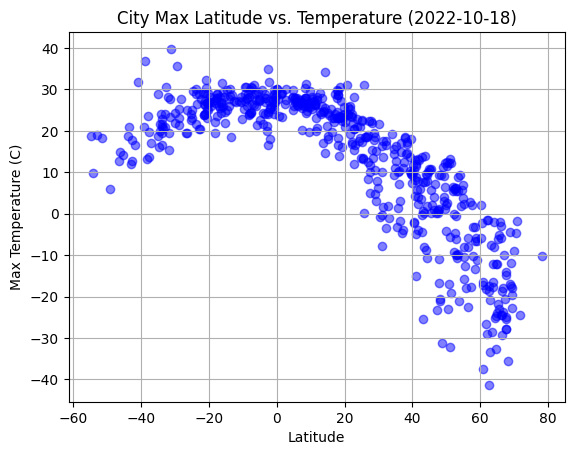

In [8]:
# Build scatter plot for latitude vs. temperature
latitude=city_data_df['Lat']
temp= city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(latitude,temp,marker='o',facecolor='blue',alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

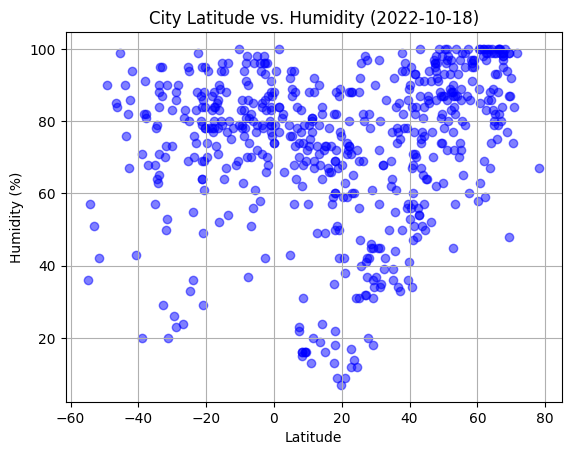

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude=city_data_df['Lat']
humidity= city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(latitude,humidity,marker='o',facecolor='blue',alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

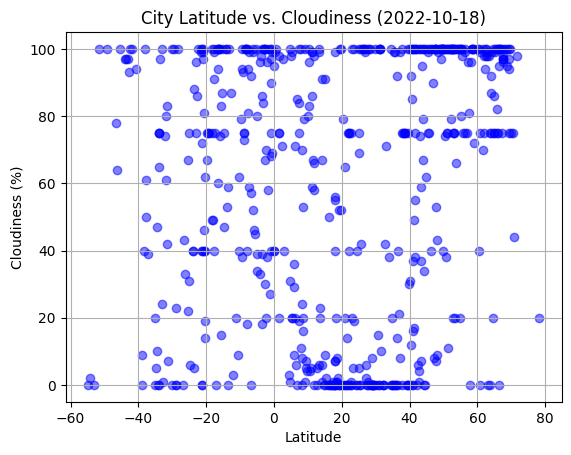

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude=city_data_df['Lat']
cloudiness= city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(latitude,cloudiness,marker='o',facecolor='blue',alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

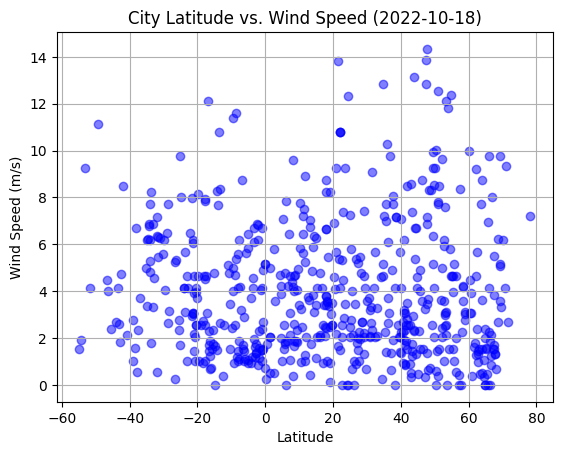

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude=city_data_df['Lat']
wind= city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(latitude,wind,marker='o',facecolor='blue',alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def hemi_regression(weather_condition,hemisphere_df):
    hemi_lat=hemisphere_df['Lat']
    condition=hemisphere_df[weather_condition]
    res=linregress(hemi_lat,condition)
    y_string = 'y=' + str(round(res.slope,2)) + 'x +' + str(round(res.intercept,2))
    rvalue_string=res.rvalue
    
    plt.plot(hemi_lat,condition,'o')
    plt.plot(hemi_lat, res.intercept + res.slope*hemi_lat, 'r', label='fitted line')
    plt.xlabel('Latitude')
    plt.ylabel(weather_condition)
    plt.annotate(y_string,(6,10),xycoords='figure pixels',fontsize = 12, color = 'red')
    print(f'r-value is:{rvalue_string}')
    plt.show()
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,usogorsk,63.4106,48.6872,-28.52,100,98,0.47,RU,1707252176
2,kuqa,41.7278,82.9364,-3.93,71,38,1.53,CN,1707252445
3,udachny,66.4167,112.4000,-29.20,82,95,1.89,RU,1707252158
6,tazovsky,67.4667,78.7000,-14.85,97,98,3.82,RU,1707252148
8,tanout,14.9709,8.8879,18.05,16,9,6.28,NE,1707252446


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,18.25,42,100,4.12,CL,1707252130
4,uturoa,-16.7333,-151.4333,28.06,85,100,12.13,PF,1707252140
5,grytviken,-54.2811,-36.5092,9.82,57,2,1.92,GS,1707252129
7,port-aux-francais,-49.3500,70.2167,6.05,90,100,11.14,TF,1707252127
12,ushuaia,-54.8000,-68.3000,18.79,36,0,1.54,AR,1707252446


###  Temperature vs. Latitude Linear Regression Plot

r-value is:-0.87050232871549


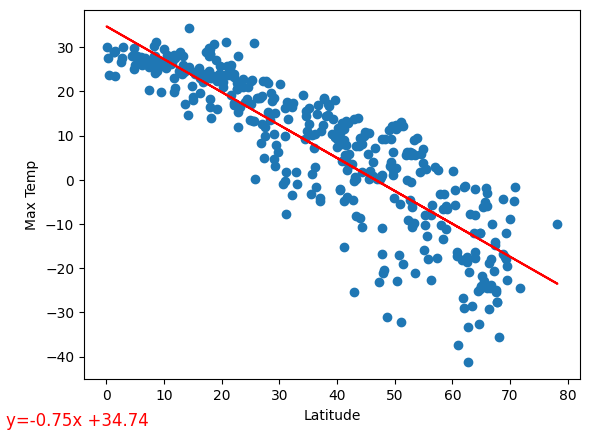

In [15]:
# Linear regression on Northern Hemisphere
hemi_regression('Max Temp',northern_hemi_df)

r-value is:0.5253336205228599


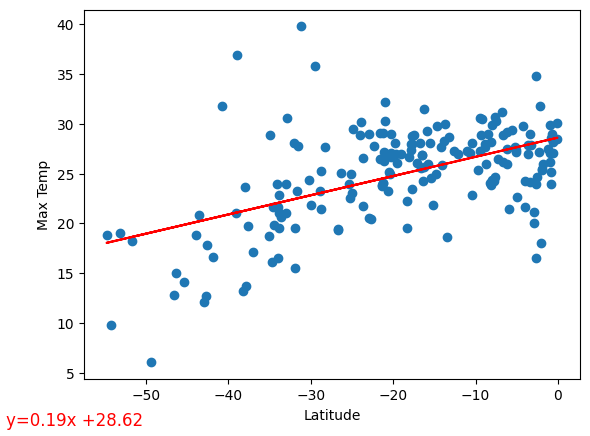

In [16]:
# Linear regression on Southern Hemisphere
hemi_regression('Max Temp',southern_hemi_df)

**Discussion about the linear relationship:** 
In the Northern Hemisphere there is a strong negative correlation with the humidity decreasing as the latitude increases. While the Southern Hemisphere has a positive correlation which is suggesting that the humidity will increase with an increase in latitude. 




### Humidity vs. Latitude Linear Regression Plot

r-value is:0.43339080394568114


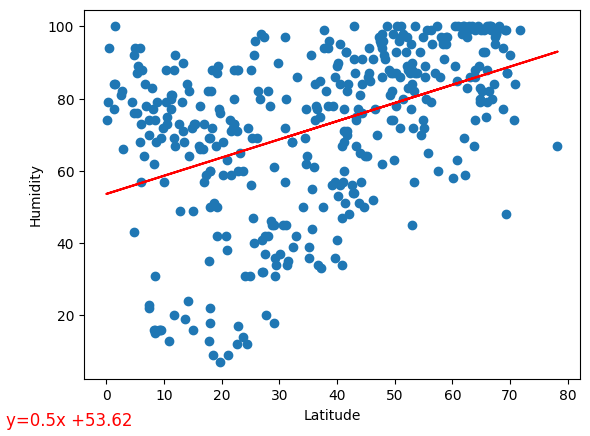

In [17]:
# Northern Hemisphere
hemi_regression('Humidity',northern_hemi_df)

r-value is:0.24035945979719603


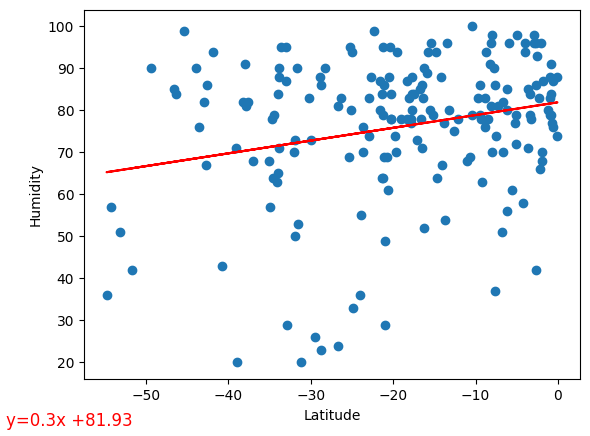

In [18]:
# Southern Hemisphere
hemi_regression('Humidity',southern_hemi_df)

**Discussion about the linear relationship:** 
There is a positive correlation in both hemispheres with the southern hemisphere being weaker. Additionally, there is potential for an increase in humidity as the latitude increases. 

### Cloudiness vs. Latitude Linear Regression Plot

r-value is:0.40339047081007456


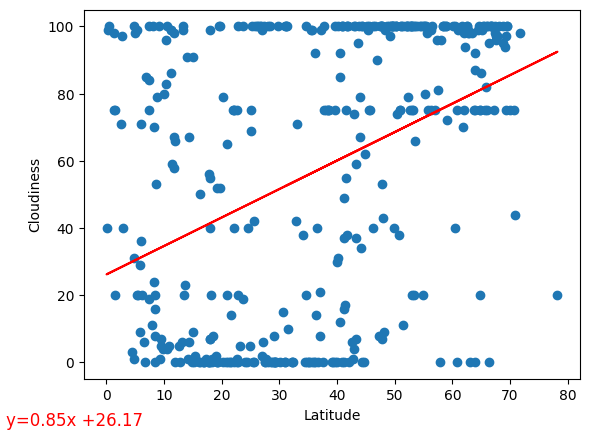

In [19]:
# Northern Hemisphere
hemi_regression('Cloudiness',northern_hemi_df)

r-value is:0.19169084792703045


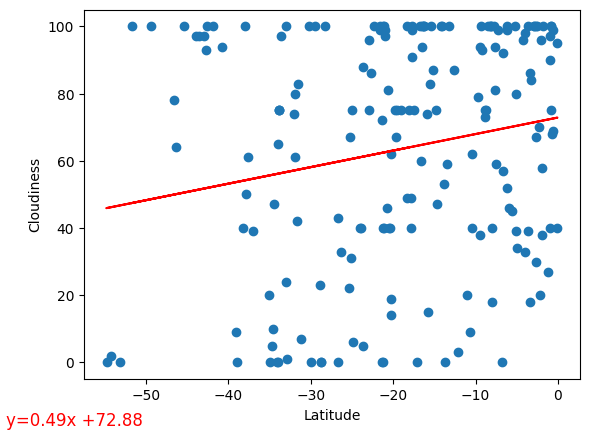

In [20]:
# Southern Hemisphere
hemi_regression('Cloudiness',southern_hemi_df)

**Discussion about the linear relationship:** 
There is a positive correlation in both hemispheres, with the Southern Hemisphere having a weaker positive correlation. In both the Northern and Southern Hemispherees there is a slight increase in cloudiness with increasing latitude, but the relationship is not very strong.

### Wind Speed vs. Latitude Linear Regression Plot

r-value is:0.008034245167511585


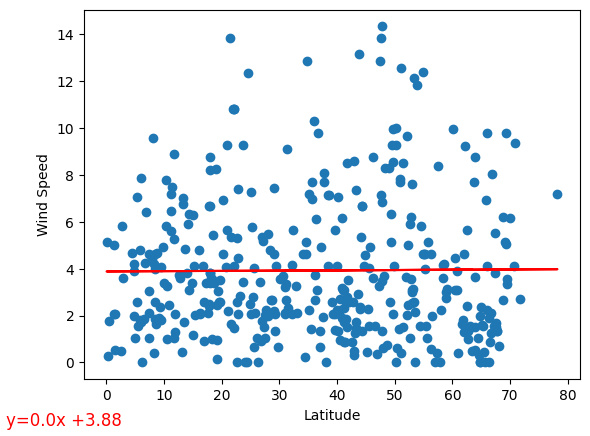

In [21]:
# Northern Hemisphere
hemi_regression('Wind Speed',northern_hemi_df)

r-value is:-0.18279287084080076


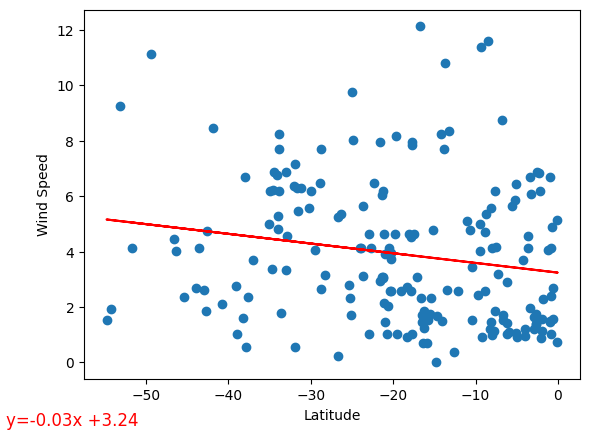

In [22]:
# Southern Hemisphere
hemi_regression('Wind Speed',southern_hemi_df)

**Discussion about the linear relationship:** 
In these linear regressions, both hemispheres have weak negative correlation with the northern hemisphere being weaker. There is a tendency for the wind speed to decrease with increasing latitude.